In [0]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web

In [2]:
# quandl lets you access tons of financial indicators
!pip install quandl
import quandl
quandl.ApiConfig.api_key = 'UVb4uimixAKqUKeUZ1sw'

     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 61kB 16.6MB/s 
     |████████████████████████████████| 2.3MB 15.6MB/s 
     |████████████████████████████████| 102kB 22.0MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=4b20b01823561b0e710fedc53f1727ac475fe8085db59cee95caa1a251ec2c4e
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [3]:
# example retrieve TSLA
tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


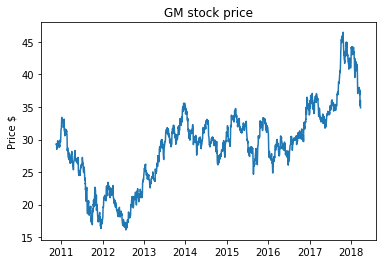

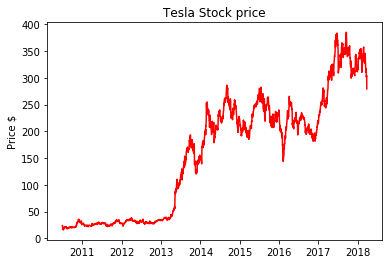

In [4]:
# explore data
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM stock price')
plt.ylabel('Price $');
plt.show()

plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock price')
plt.ylabel('Price $');
plt.show()

In [5]:
print(gm.dtypes)
print(tesla.shape)

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object
(1949, 12)


In [6]:
# find mkt cap
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

tesla['Year'] = tesla.index.year
tesla.reset_index(level=0, inplace=True)
tesla['cap'] = 0

for i, year in enumerate(tesla['Year']):
  shares = tesla_shares.get(year)
  # update cap column to shares*price
  tesla.ix[i, 'cap'] = shares*tesla.ix[i, 'Adj. Close']
  
gm['Year'] = gm.index.year
gm.reset_index(level=0, inplace=True)
gm['cap'] = 0

for i, year in enumerate(gm['Year']):
  shares = gm_shares.get(year)
  gm.ix[i, 'cap'] = shares * gm.ix[i,'Adj. Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [7]:
# merge data sets and rename columns
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)

cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]

# divide by billions for market cap
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


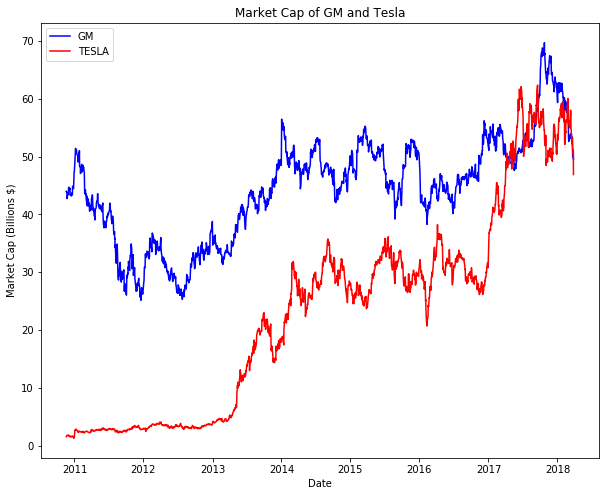

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend();

In [14]:
# find first /last time TSLA valued higher than GM
first_date = cars.loc[np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
last_date = cars.loc[np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']

print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.


In [15]:
# Modeling with Facebook Prophet package
!pip install fbprophet
import fbprophet

In [16]:
# Prophet requires columns ds(Date) and y(pred value)
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})

gm['y'] = gm['y'] / 1e9

#create prophet model and fit data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(gm)

# pay attention to changepoints = hyperparameter measuring overfitting vs underfitting in prophet model
# changepoints can also be adjusted during significant events like product launch/macroeconomic dhanges in market

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# make future datafrmae for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365*2, freq='D')
# make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

Text(0.5, 1.0, 'Market Cap GM')

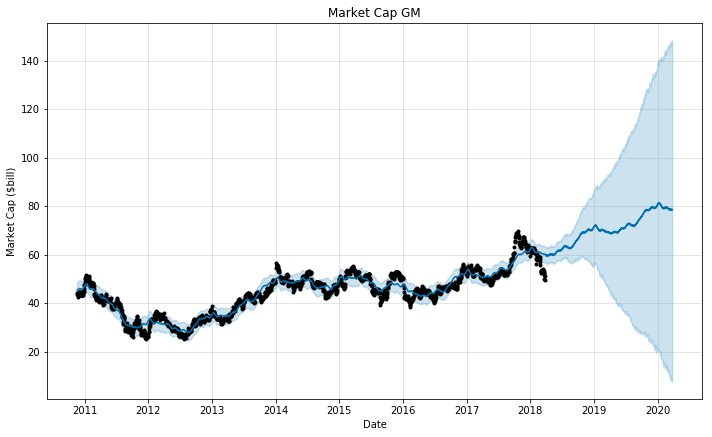

In [18]:
gm_prophet.plot(gm_forecast, xlabel="Date", ylabel="Market Cap ($bill)")
plt.title("Market Cap GM")

In [20]:
tesla = tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla['y'] = tesla['y'] / 1e9
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
tesla_prophet.fit(gm)
tesla_prophet.changepoints[:10]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


59    2011-02-14
118   2011-05-10
177   2011-08-03
236   2011-10-26
296   2012-01-24
355   2012-04-18
414   2012-07-12
473   2012-10-04
532   2013-01-02
591   2013-03-28
Name: ds, dtype: datetime64[ns]

In [0]:
tesla_forecast = tesla_prophet.make_future_dataframe(periods=365*2, freq='D')
# make predictions
tesla_forecast = tesla_prophet.predict(tesla_forecast)

In [22]:
# merge and rename cols to keep track of data
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
print(gm_names)
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]

# merge proc
merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()

#rename
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names

forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how='inner', left_on = 'gm_ds', right_on='tesla_ds')
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)

['gm_ds', 'gm_trend', 'gm_yhat_lower', 'gm_yhat_upper', 'gm_trend_lower', 'gm_trend_upper', 'gm_additive_terms', 'gm_additive_terms_lower', 'gm_additive_terms_upper', 'gm_weekly', 'gm_weekly_lower', 'gm_weekly_upper', 'gm_yearly', 'gm_yearly_lower', 'gm_yearly_upper', 'gm_multiplicative_terms', 'gm_multiplicative_terms_lower', 'gm_multiplicative_terms_upper', 'gm_yhat']


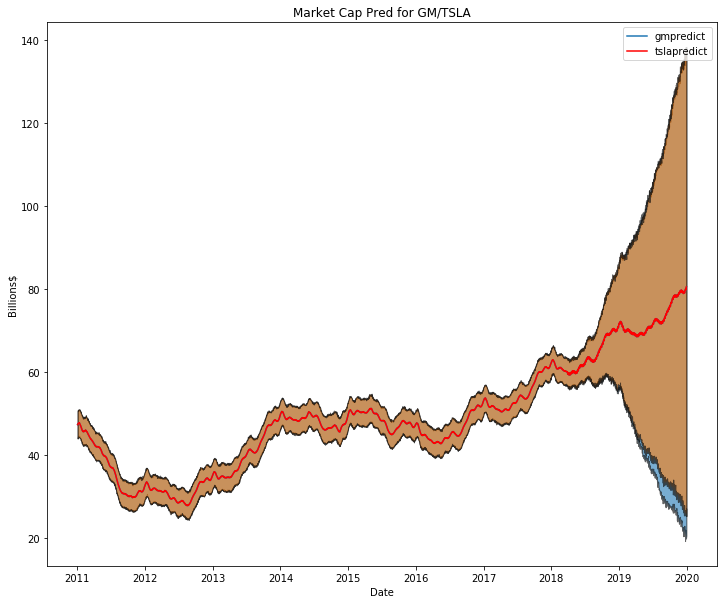

In [27]:
# https://github.com/WillKoehrsen/Data-Analysis/blob/master/additive_models/Stock%20Explorer%20Class.ipynb
forecast = forecast[forecast['Date'] > '2010-12-31']
forecast = forecast[forecast['Date'] < '2020-01-01']

fig, ax = plt.subplots(1,1, figsize=(12,10));

ax.plot(forecast['Date'], forecast['gm_yhat'],  label='gmpredict');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor='k');

ax.plot(forecast['Date'], forecast['tesla_yhat'], 'r',label='tslapredict');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, edgecolor='k');

plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions$'); plt.title('Market Cap Pred for GM/TSLA');

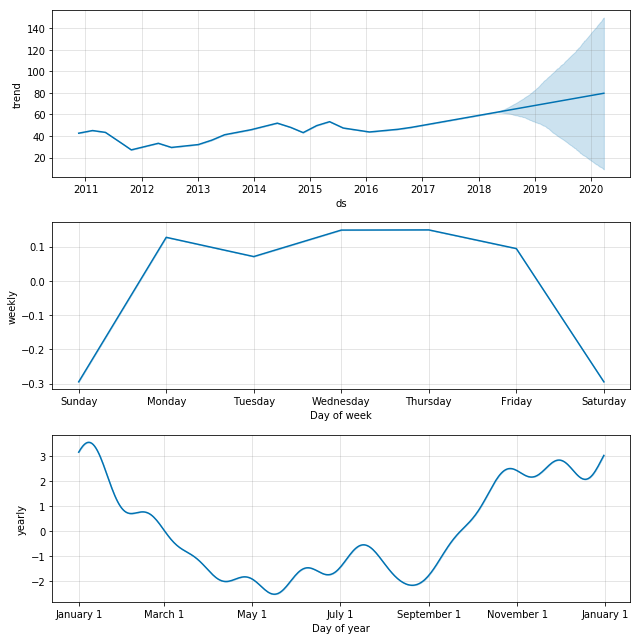

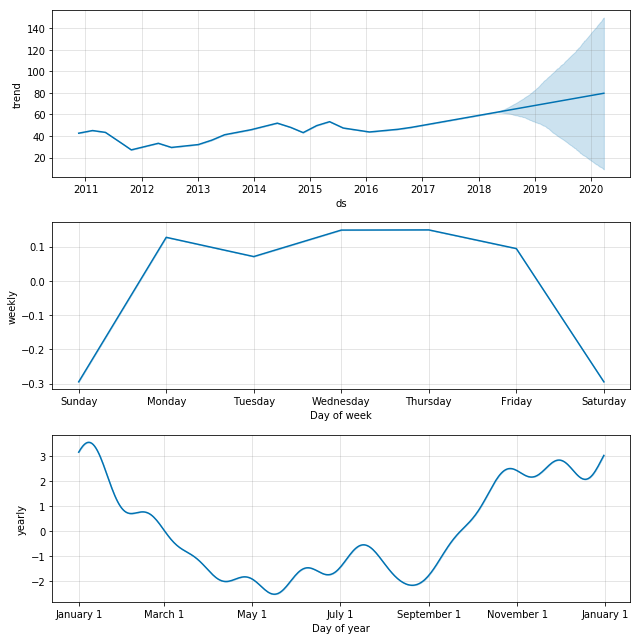

In [28]:
# Trends
gm_prophet.plot_components(gm_forecast)

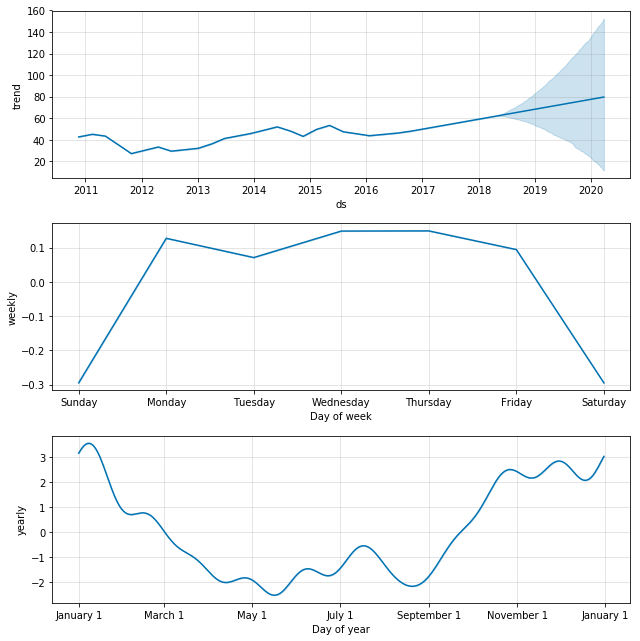

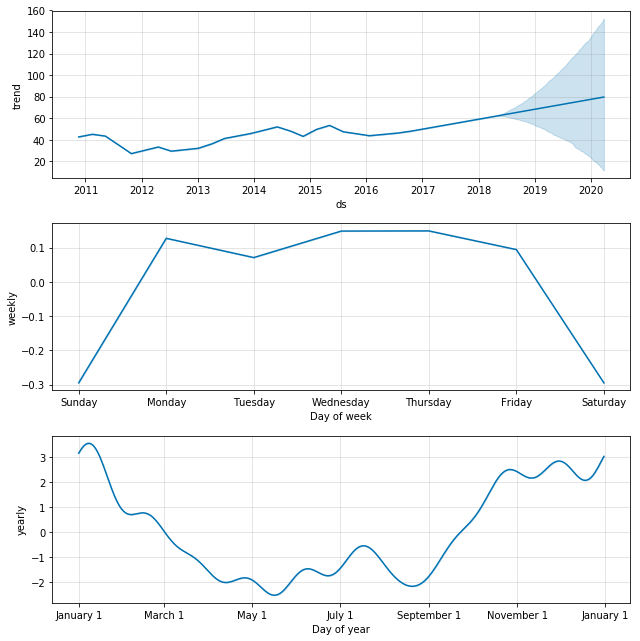

In [29]:
tesla_prophet.plot_components(tesla_forecast)